# Загрузка и предобработка данных из различных источников
## Загрузка данных для работы с моделью
Прежде чем вы начнете свой проект машинного обучения, вам потребуется загрузить свои данные. Нужный нам файл **'pima-indians-diabetes.csv'** можно скачать, например, на сайте https://archive.org/download/scecs
Наиболее распространенным форматом данных машинного обучения являются файлы CSV («comma separated values», значения, разделенные запятыми).

In [1]:
# Загрузка файла CSV с использованием стандартной библиотеки Python
import csv
import numpy
filename = 'pima-indians-diabetes.csv'
# Используем стандартный объект reader модуля CSV, данные в 
with open(filename, 'r') as f:
    data = list(csv.reader(f, delimiter=","))
# Преобразуем список, в который считано содержимое, в массив NumPy  
data = numpy.array(data)
print(data.shape)
print(data)

(768, 9)
[['6' '148' '72' ... '0.627' '50' '1']
 ['1' '85' '66' ... '0.351' '31' '0']
 ['8' '183' '64' ... '0.672' '32' '1']
 ...
 ['5' '121' '72' ... '0.245' '30' '0']
 ['1' '126' '60' ... '0.349' '47' '1']
 ['1' '93' '70' ... '0.315' '23' '0']]


Если вам известно размещение файла данных в сети Интернет, то к нему можно обратиться напрямую при помощи библиотеки urllib и методов библиотеки NumPy

In [2]:
# Прямое чтение файла через обращение по сети Интернет
from urllib import request
import csv
import numpy
url = 'https://archive.org/download/scecs/pima-indians-diabetes.csv'
# Используем метод loadtxt модуля NumPy
with request.urlopen(url) as f:
    data = list(numpy.loadtxt(f, delimiter=","))
# Преобразуем список, в который считано содержимое, в массив NumPy 
data = numpy.array(data)
print(data.shape)
print(data)

(768, 9)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [3]:
# Загрузка CSV-файлов с помощью Pandas
from pandas import read_csv
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
print(data.shape)
display(data.head())

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Обратите внимание, что в этом примере мы явно указываем имена каждого атрибута dataFrame, а затем для наглядности выводим заголовок фрейма данных.
Мы можем загрузить данные CSV непосредственно с URL-адреса

In [4]:
# Загрузка CSV-файлов с помощью Pandas через Интернет
from pandas import read_csv
url = 'https://archive.org/download/scecs/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
print(data.shape)
display(data.head())

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Дескриптивная (описательная) статистика
Просмотр необработанных данных представляет собой важную часть работы. Глядя на необработанные данные, аналитик может выявить идеи, которые не получится извлечь каким-либо другим способом. На этой стадии могут быть получены первоначальные идеи о том, как в дальнейшем можно выполнять обработку данных для задач машинного обучения. Вы можете просмотреть 20 строк данных с помощью функции head( ) в Pandas DataFrame.

In [2]:
# Просмотр первых 5 строк датасета
from pandas import read_csv
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
peek = data.head(5)
print(peek)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


## Размерность данных
Вы должны очень хорошо понимать, каким объемом данных вы располагаете, как в виде строк, так и в виде столбцов.
- При избыточном количестве строк обучение алгоритмов может занять слишком много времени. 
-При малом количестве строк их может быть недостаточно для обучения алгоритмов.
-При избыточном количестве атрибутов модели некоторые алгоритмы могут показывать низкую точность из-за проклятия размерности.


In [6]:
# Оценка размерности данных
from pandas import read_csv
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
shape = data.shape
print(shape)

(768, 9)


## Тип данных для каждого атрибута
Важен тип каждого атрибута. Строки, возможно, потребуется преобразовать в значения с плавающей точкой или в целые числа для представления категориальных или порядковых значений. Вы можете получить представление о типах атрибутов, взглянув на исходные данные, как указано выше.

In [7]:
# Типы данных для каждого атрибута
from pandas import read_csv
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


## Описательная статистика
Описательная статистика позволяет получить представление о форме каждого атрибута. Часто вы можете создать больше резюме, чем у вас есть времени на просмотр.

In [8]:
# Статистический обзор набора данных
from pandas import read_csv
from pandas import set_option
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('display.precision', 3)
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


## Распределение классов (только для задач классификации)
В задачах классификации необходимо знать, насколько сбалансировано количество представителей различных классов в выборке. Крайне несбалансированные проблемы (гораздо больше наблюдений для одного класса, чем для другого) могут потребовать специальной обработки на этапе подготовки данных вашего проекта.

In [9]:
# Распределение выборки по классам
from pandas import read_csv
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


Видно, что существует почти вдвое больше наблюдений с классом 0 (отсутствие диабета), чем с классом 1 (начало диабета).
##	Корреляции между атрибутами
Корреляция характеризует меру линейной связи между двумя переменными. Наиболее распространенным методом вычисления корреляции является коэффициент корреляции Пирсона, который предполагает нормальное распределение соответствующих атрибутов. Корреляция, равная -1 или 1, показывает полную отрицательную или положительную корреляцию соответственно, а при значении равном 0 линейная связь полностью отсутствует.
Некоторые алгоритмы машинного обучения, такие как линейная и логистическая регрессия, могут показывать плохие результаты при наличии в вашем наборе данных сильно коррелированных атрибутов. 
Таким образом, важной задачей является оценка парных корреляций атрибутов в вашем наборе данных.

In [10]:
# Матрица значений парной корреляции Пирсона между атрибутами данных
from pandas import read_csv
from pandas import set_option
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('display.precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


В матрице перечислены все атрибуты по строкам и столбцам, что позволяет оценить корреляцию между всеми парами атрибутов (дважды, поскольку матрица симметрична). Можно видеть, что главная диагональ корреляционной матрицы занята единичными значениями, что говорит об идеальной корреляцию каждого атрибута с самим собой.
## Асимметрия одномерных распределений
Понятие асимметрии (перекоса) относится к распределению, предполагающемуся гауссовым (нормальная или колоколообразная кривая), которое смещено или сжато в том или ином направлении. Многие алгоритмы машинного обучения предполагают распределение по Гауссу. Понимание того, что атрибут имеет перекос, может позволить вам выполнить подготовку данных, чтобы исправить перекос и впоследствии повысить точность ваших моделей.

In [11]:
# Оценка асимметрии распределения атрибутов
from pandas import read_csv
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


Величина асимметрии показывает положительный (вправо) или отрицательный (влево) перекос. Значения, близкие к нулю, показывают меньшую асимметрию.
# Понимание данных с помощью визуализации
Самый быстрый способ оценки данных – это использовать их визуализацию. В этом разделе будут рассмотрены методы визуализации данных машинного обучения на языке Python с помощью Pandas. Как и в предыдущих разделах используется набор данных о возникновении диабета у индейцев Пима.
## Гистограммы
Быстрый способ получить представление о распределении каждого атрибута - посмотреть на гистограммы. Гистограммы группируют данные по ячейкам и предоставляют вам подсчет количества наблюдений в каждой ячейке. По форме ячеек вы можете быстро получить представление о том, является ли атрибут гауссовым, искаженным или даже имеет экспоненциальное распределение. Это также позволит оценить возможные отклонения.

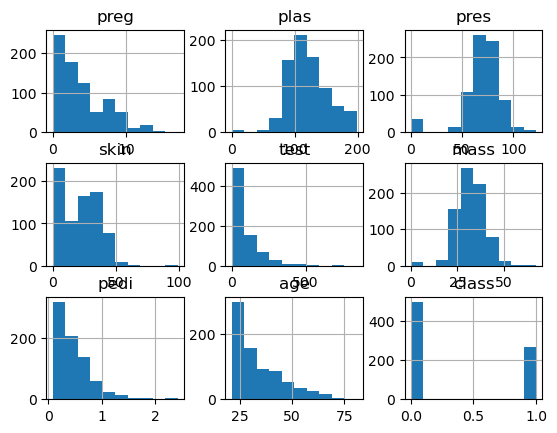

In [12]:
# Одномерная гистограмма
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.hist()
pyplot.show()

Можно видеть, что атрибуты **age**, **pedi** и **test** имеют распределение, близкое к экспоненциальному, а атрибуты **mass**, **pres** и **place** – близкое к гауссовскому. Это интересно, потому что многие методы машинного обучения предполагают гауссово одномерное распределение входных переменных.
## Диаграммы плотности
Диаграммы плотности – еще один способ получить быстрое представление о распределении каждого атрибута. Графики выглядят как гистограмма с гладкой кривой, построенной через верхнюю точку каждого столбика диаграммы (подсознательно человек пытается оценить гистограмму именно так).
График плотности выглядит четче, чем гистограмма для тех же данных.

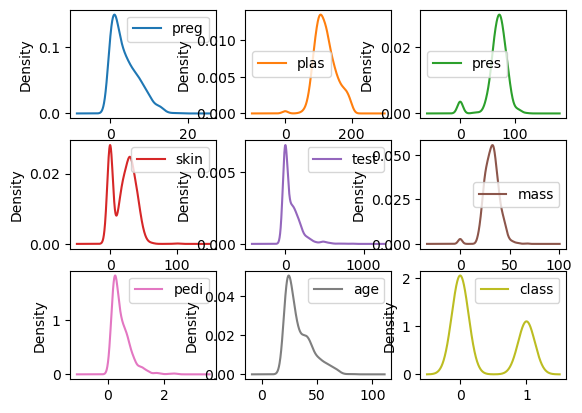

In [13]:
# Одномерая диаграмма плотности
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

## Диаграммы «ящик с усами»
Еще один полезный способ просмотреть распределение каждого атрибута – использовать диаграммы «ящик с усами», или сокращенно boxplots. Такие диаграммы суммируют распределение каждого атрибута, показывая линию для медианы (среднего значения) и прямоугольник вокруг 25-го и 75-го процентилей (средние 50% данных). Усы дают представление о разбросе данных, а точки за пределами усов показывают возможные значения выбросов (значения, которые в 1,5 раза превышают размер разброса средних 50% данных).

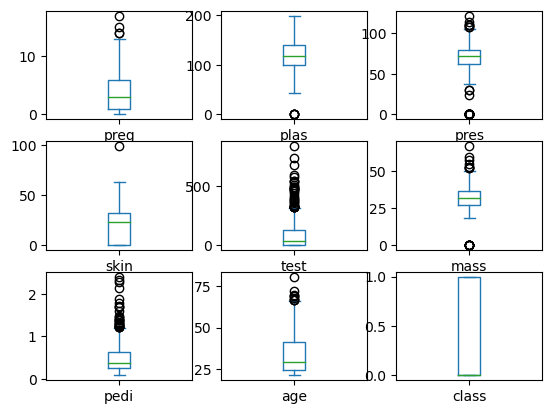

In [14]:
# Диаграмма "яшик с усами"
from matplotlib import pyplot
from pandas import read_csv
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

Можно видеть, что распределение атрибутов совершенно различно. Некоторые из них, такие как age, test и skin, кажутся довольно искаженными в сторону меньших значений.
## Матрица корреляции
Корреляция дает представление о том, насколько связаны изменения между двумя переменными. Если две переменные изменяются в одном направлении, они положительно коррелируют. Если они меняются в противоположных направлениях (один идет вверх, другой идет вниз), то они скоррелированы отрицательно. Величины корреляции между каждой парой атрибутов называется корреляционной матрицей. Визуализация корреляционной матрицы позволяет наглядно оценить, какие переменные имеют высокую корреляцию друг с другом. Эта информация весьма полезна, поскольку некоторые алгоритмы машинного обучения, такие как линейная и логистическая регрессия, могут иметь низкую эффективность и точность в случае, если в исходных данных присутствуют сильно скоррелированные входные переменные.

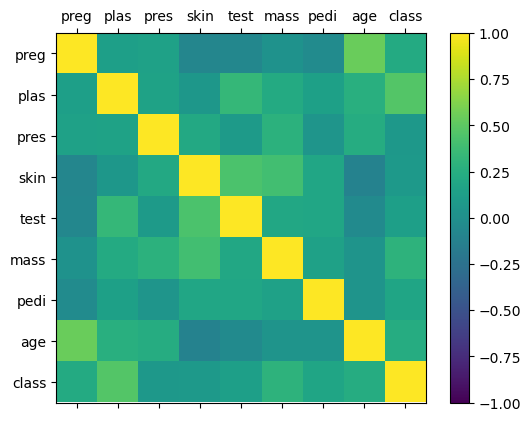

In [15]:
# Графическая матрица корреляции
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# Построение корреляционной матрицы
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

Мы видим, что матрица симметрична, т.е. нижний левый угол матрицы совпадает с верхним правым. Это полезно, так как мы можем видеть два вида на одни и те же данные на одном графике. Мы также можем видеть, что каждая переменная идеально коррелирует друг с другом (как и следовало ожидать) в диагональной линии от левого верхнего края до внизу справа.
Пример не является универсальным в том смысле, что в нем указаны имена атрибутов вдоль осей, а также количество отсечек. Этот рецепт можно сделать более общим, удалив эти аспекты следующим образом:

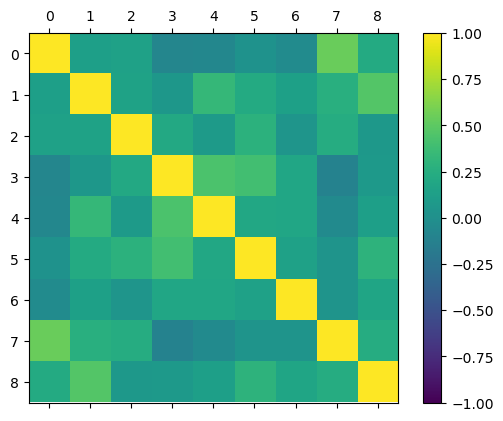

In [16]:
# Обобщенная графическая матрица корреляции
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

Построив график в таком варианте, можно видеть, что он дает ту же информацию, хотя и немного затрудняет понимание того, как значения парных корреляций соотносятся с названиями атрибутов. Этот общий график рекомендуется использовать в качестве первой прикидки, чтобы понять корреляции в наборе данных, и только затем при необходимости его можно настроить так, как показано в предыдущем примере чтобы оценить скоррелированность факторов более конкретно.
## Матрица рассеяния
Точечная диаграмма, которую называют также диаграммой рассеяния, показывает взаимосвязь между двумя переменными в виде точек в двух измерениях, по одной оси для каждого атрибута. Такую диаграмму можно построить для всех пар атрибутов в исходных данных.
Объединение всех этих точечных графиков называется матрицей рассеяния. Такие диаграммы полезны для определения структурированных взаимосвязей между переменными, например, можно ли линейно суммировать взаимосвязь между двумя переменными. Атрибуты со структурированными связями также могут быть коррелированными, а значит – хорошими кандидатами на удаление из набора данных.

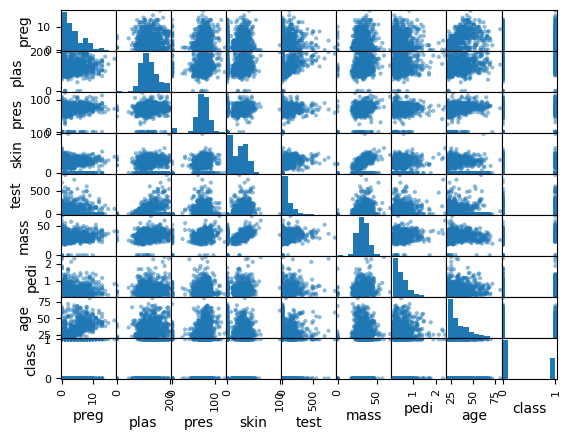

In [17]:
# Построение матрицы рассеяния
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
filename = "pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
scatter_matrix(data)
pyplot.show()

Как и приведенный выше график корреляционной матрицы, матрица рассеяния симметрична, что полезно для того, чтобы взглянуть на парные взаимосвязи с разных точек зрения. Поскольку нет особого смысла рисовать диаграмму рассеяния каждой переменной относительно неё самой, по диагонали строятся гистограммы для каждого атрибута.
# Подготовка данных для решения задач машинного обучения


Многие алгоритмы машинного обучения делают предположения о ваших данных. Часто бывает очень хорошей идеей подготовить данные таким образом, чтобы наилучшим образом раскрыть структуру проблемы для алгоритмов машинного обучения, которые предполагается использовать. 
## Перемасштабирование данных
Если исходные данные состоят из атрибутов с различными масштабами, многие алгоритмы машинного обучения могут испытывать существенные сложности с решением заданной задачи. Приведение всех числовых данных к единому масштабу позволяют ускорить сходимость процесса обучения и в ряде случаев повысить точность 

In [18]:
# Перемасштабирование данных на интервал [0,1]
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# делим данные на входные X и выходные Y
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# обобщение трансформированных данных
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


После перемасштабирования можно увидеть, что все значения находятся в диапазоне от 0 до 1.
## Стандартизация данных
Стандартизация представляет собой полезный метод преобразования атрибутов, распределенных по Гауссу с различными средними значениями и стандартными отклонениями, в Гауссовское распределение со средним значением 0 и стандартным отклонением 1. Метод лучше всего подходит для методов, которые предполагают гауссово распределение входных переменных и работают эффективно с масштабированными данными, таких как линейная регрессия, логистическая регрессия и линейный дискриминантный анализ. 

In [19]:
# Стандартизация данных (среднее - 0, дисперсия - 1v)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# делим данные на входные X и выходные Y
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# обобщение трансформированных данных
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


Значения для каждого атрибута теперь имеют среднее значение 0 и стандартное отклонение 1.
## Нормализация данных
Под нормализацией в scikit-learn понимается масштабирование каждого наблюдения (строки) так, чтобы оно имело длину 1 (в линейной алгебре это называется единичной нормой или вектором длиной 1). Этот метод предварительной обработки может быть полезен для разреженных наборов данных (много нулей) с атрибутами различного масштаба при использовании алгоритмов, которые взвешивают входные значения, таких как нейронные сети, и алгоритмов, которые используют меры расстояния, такие как k-средних. 

In [20]:
# Нормализация данных (приведение данных к векторам единичной длины)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# делим данные на входные X и выходные Y
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# обобщение трансформированных данных
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


## Бинаризация данных (перевод в двоичную форму)
При необходимости преобразовать данные в двоичную форму (например, при оценке наличия и отсутствия сигнала, поступающего в аналоговом виде). Данные можно преобразовать, используя двоичный порог, когда все значения, превышающие пороговое значение, помечаются как 1, а все значения, равные или меньшие, помечаются как 0. Это называется бинаризацией или контрастированием данных. 
Решение этой задачи может быть полезно при необходимости преобразовать вещественные значения вероятности в четкие значения, а также при анализе значимости входных атрибутов (задача контрастирования).

In [21]:
# Выполнение бинаризации данных
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# делим данные на входные X и выходные Y
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# обобщение трансформированных данных
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


Можно видеть, что все значения, равные или меньшие 0 помечены 0, а все значения выше 0 помечены 1.
# Отбор переменных для машинного обучения 
Выбор переменных, используемых для обучения моделей, оказывают огромное влияние на их эффективность и точность. Нерелевантные или частично релевантные переменные могут отроицательно повлиять на качество модели.
## Отбор переменных
Отбор переменных представляет собой процесс, при котором происходит автоматический выбор атрибутов данных, которые в наибольшей степени влияют на интересующую вас прогнозируемую переменную или выходные данные. Наличие нерелевантных функций в ваших данных может снизить точность многих моделей, особенно линейных алгоритмов, таких как линейная и логистическая регрессия. Тремя преимуществами выполнения отбора переменных перед началом моделирования являются:
- Снижение неопределенности: чем меньше избыточных данных, тем ниже вероятность, что решение будет принято на основе шума.
- Повышение точности: уменьшение количества вводящих в заблуждение данных означает повышение точности моделирования.
- Снижение вычислительной сложности: Меньшее количество данных означает, что алгоритмы обучаются быстрее.
## Одномерный выбор
Статистические тесты могут быть использованы для выбора тех признаков, которые имеют наиболее сильную связь с выходной переменной. Библиотека scikit-learn предоставляет класс SelectKBest, который можно использовать с набором различных статистических тестов для выбора определенного количества функций. В приведенном ниже примере используется статистический критерий хи-квадрат (chi2) для неотрицательных признаков, чтобы выбрать 4 наилучших признака из набора данных о начале диабета у индейцев Pima.

In [22]:
# Извлечение признаков с помощью одномерных статистических тестов (Хи-квадрат для задач классификации)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# отбор признаков
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(names)
print(fit.scores_)
features = fit.transform(X)
# обобщение трансформированных данных
print(features[0:5,:])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


Можно увидеть оценки для каждого атрибута и 4 выбранных атрибута (с самыми высокими баллами): plas, test, mass и age. Атрибуты выбраны путем сопоставления 4 самых высоких баллов с именами атрибутов.
## Устранение рекурсивных переменных
Устранение рекурсивных переменных (Recursive Feature Elimination, RFE) работает путем рекурсивного удаления атрибутов и построения модели на тех атрибутах, которые остались. Он использует точность модели, чтобы определить, какие атрибуты (и комбинации атрибутов) вносят наибольший вклад в прогнозирование целевого значения.

In [1]:
# Устранение рекурсивных переменных с помощью RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
max_iter = 200
# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# извлечение признаков
model = LogisticRegression(max_iter=max_iter)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Количество признаков: %d" % fit.n_features_)
print(names)
print("Выбранные признаки: %s" % fit.support_)
print("Ранжировка признаков: %s" % fit.ranking_)

Количество признаков: 3
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
Выбранные признаки: [ True False False False False  True  True False]
Ранжировка признаков: [1 2 4 6 5 1 1 3]


Можно видеть, что RFE выбрал топ-3 переменных – preg, mass и pedi. Они помечены True в массиве support_array и значением 1 в массиве ranking_array. Это же сопоставление можно выполнить и вручную.
## Метод главных компонент
Метод главных компонент (МГК или Principal Component Analysis, PCA) использует линейную алгебру для преобразования набора данных в компактную форму. Обычно это называется методом сокращения объема данных. Свойством PCA является то, что вы можете выбрать количество измерений или основных компонентов в преобразованном результате. В приведенном ниже примере МГК используется для выбора 3 основных компонентов.

In [24]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


Можно видеть, что преобразованный набор данных (3 основных компонента) мало похож на исходные данные.
## Важность переменных
Деревья принятия решений, такие как Random Forest и Extra Trees, могут использоваться для оценки важности объектов. В приведенном ниже примере мы построим классификатор ExtraTreesClassifer для набора данных о диабете у индейцев Пима.

In [25]:
# Оценка важности переменных при помощи чрезвычайно рандомизированных деревьев Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(X, Y)
print(names)
print(model.feature_importances_)

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[0.11  0.236 0.097 0.08  0.077 0.143 0.116 0.141]


Атрибутам присваивается оценка важности, чем выше оценка, тем важнее атрибут. Полученные оценки свидетельствуют о важности plas, age и mass.